In [1]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
inputfile = '../data/data1.csv' #输入的数据文件
data = pd.read_csv(inputfile) #读取数据
r = [data.min(), data.max(), data.mean(), data.std()] #依次计算最小值、最大值、均值、标准差
r = pd.DataFrame(r, index = ['Min', 'Max', 'Mean', 'STD']).T  #计算相关系数矩阵
np.round(r, 2) #保留两位小数

,Min,Max,Mean,STD
x1,3831732.00,7599295.00,5579519.95,1262194.72
x2,181.54,2110.78,765.04,595.70
x3,448.19,6882.85,2370.83,1919.17
x4,7571.00,42049.14,19644.69,10203.02
x5,6212.70,33156.83,15870.95,8199.77
x6,6370241.00,8323096.00,7350513.60,621341.85
x7,525.71,4454.55,1712.24,1184.71
x8,985.31,15420.14,5705.80,4478.40
x9,60.62,228.46,129.49,50.51
x10,65.66,852.56,340.22,251.58


In [2]:
#皮尔森相关系数是衡量线性关联性的程度---连续变量
np.round(data.corr(method = 'pearson'), 2) #计算相关系数矩阵，保留两位小数

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.00,0.95,0.95,0.97,0.97,0.99,0.95,0.97,0.98,0.98,-0.29,0.94,0.96,0.94
x2,0.95,1.00,1.00,0.99,0.99,0.92,0.99,0.99,0.98,0.98,-0.13,0.89,1.00,0.98
x3,0.95,1.00,1.00,0.99,0.99,0.92,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x4,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.19,0.91,1.00,0.99
x5,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.18,0.90,0.99,0.99
x6,0.99,0.92,0.92,0.95,0.95,1.00,0.93,0.95,0.97,0.96,-0.34,0.95,0.94,0.91
x7,0.95,0.99,1.00,0.99,0.99,0.93,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x8,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.15,0.90,1.00,0.99
x9,0.98,0.98,0.98,0.99,0.99,0.97,0.98,0.99,1.00,0.99,-0.23,0.91,0.99,0.98
x10,0.98,0.98,0.99,1.00,1.00,0.96,0.99,1.00,0.99,1.00,-0.17,0.90,0.99,0.99


In [3]:
from sklearn.linear_model import Lasso,LassoLarsIC
#对套索回归 常数乘以L1项，使用L2范数来归一化
reg = LassoLarsIC(criterion='aic')
reg.fit(data.iloc[:,0:13],data['y'])
#model = Lasso(alpha=1,normalize=True)
#model.fit(data.iloc[:,0:13],data['y'])
print(reg.coef_)
#print(model.coef_) #各个特征的系数

[0.         0.         0.05745012 0.         0.         0.
 0.29140935 0.         0.         0.         0.         0.
 0.        ]


In [4]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from GM11 import GM11 #引入自己编写的灰色预测函数

inputfile = '../data/data1.csv' #输入的数据文件
outputfile = '../tmp/data1_GM11.xls' #灰色预测后保存的路径
outputfile = '../tmp/data1_GM12.xls'
data = pd.read_csv(inputfile) #读取数据
data.index = range(1994, 2014)

data.loc[2014] = None
data.loc[2015] = None
l = ['x1', 'x2', 'x3', 'x4', 'x5', 'x7']
l1 = ['x3','x5','x7']
for i in l1:
  f,_,_,_,C,_ = GM11(data[i].loc[range(1994,2014)].values)
  print("%s后验差比值：%0.4f"%(i,C))
  data[i].loc[2014] = f(len(data)-1) #2014年预测结果
  data[i].loc[2015] = f(len(data)) #2015年预测结果
  data[i] = data[i].round(2) #保留两位小数

data[l1+['y']].to_excel(outputfile) #结果输出

x3后验差比值：0.1239
x5后验差比值：0.0447
x7后验差比值：0.1048


C:\software\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/10000
 - 0s - loss: 0.1216
Epoch 2/10000
 - 0s - loss: 0.1117
Epoch 3/10000
 - 0s - loss: 0.1028
Epoch 4/10000
 - 0s - loss: 0.0952
Epoch 5/10000
 - 0s - loss: 0.0869
Epoch 6/10000
 - 0s - loss: 0.0823
Epoch 7/10000
 - 0s - loss: 0.0767
Epoch 8/10000
 - 0s - loss: 0.0705
Epoch 9/10000
 - 0s - loss: 0.0674
Epoch 10/10000
 - 0s - loss: 0.0634
Epoch 11/10000
 - 0s - loss: 0.0584
Epoch 12/10000
 - 0s - loss: 0.0562
Epoch 13/10000
 - 0s - loss: 0.0527
Epoch 14/10000
 - 0s - loss: 0.0493
Epoch 15/10000
 - 0s - loss: 0.0458
Epoch 16/10000
 - 0s - loss: 0.0433
Epoch 17/10000
 - 0s - loss: 0.0406
Epoch 18/10000
 - 0s - loss: 0.0378
Epoch 19/10000
 - 0s - loss: 0.0352
Epoch 20/10000
 - 0s - loss: 0.0332
Epoch 21/10000
 - 0s - loss: 0.0305
Epoch 22/10000
 - 0s - loss: 0.0292
Epoch 23/10000
 - 0s - loss: 0.0274
Epoch 24/10000
 - 0s - loss: 0.0257
Epoch 25/10000
 - 0s - loss: 0.0242
Epoch 26/10000
 - 0s - loss: 0.0226
Epoch 27/10000
 - 0s - loss: 0.0218
Epoch 28/10000
 - 0s - loss: 0.0205
E

Epoch 226/10000
 - 0s - loss: 0.0062
Epoch 227/10000
 - 0s - loss: 0.0062
Epoch 228/10000
 - 0s - loss: 0.0062
Epoch 229/10000
 - 0s - loss: 0.0063
Epoch 230/10000
 - 0s - loss: 0.0063
Epoch 231/10000
 - 0s - loss: 0.0063
Epoch 232/10000
 - 0s - loss: 0.0063
Epoch 233/10000
 - 0s - loss: 0.0063
Epoch 234/10000
 - 0s - loss: 0.0063
Epoch 235/10000
 - 0s - loss: 0.0062
Epoch 236/10000
 - 0s - loss: 0.0063
Epoch 237/10000
 - 0s - loss: 0.0063
Epoch 238/10000
 - 0s - loss: 0.0063
Epoch 239/10000
 - 0s - loss: 0.0062
Epoch 240/10000
 - 0s - loss: 0.0061
Epoch 241/10000
 - 0s - loss: 0.0062
Epoch 242/10000
 - 0s - loss: 0.0061
Epoch 243/10000
 - 0s - loss: 0.0062
Epoch 244/10000
 - 0s - loss: 0.0062
Epoch 245/10000
 - 0s - loss: 0.0062
Epoch 246/10000
 - 0s - loss: 0.0062
Epoch 247/10000
 - 0s - loss: 0.0062
Epoch 248/10000
 - 0s - loss: 0.0062
Epoch 249/10000
 - 0s - loss: 0.0062
Epoch 250/10000
 - 0s - loss: 0.0062
Epoch 251/10000
 - 0s - loss: 0.0062
Epoch 252/10000
 - 0s - loss: 0.0061
E

Epoch 448/10000
 - 0s - loss: 0.0054
Epoch 449/10000
 - 0s - loss: 0.0056
Epoch 450/10000
 - 0s - loss: 0.0057
Epoch 451/10000
 - 0s - loss: 0.0058
Epoch 452/10000
 - 0s - loss: 0.0057
Epoch 453/10000
 - 0s - loss: 0.0057
Epoch 454/10000
 - 0s - loss: 0.0055
Epoch 455/10000
 - 0s - loss: 0.0055
Epoch 456/10000
 - 0s - loss: 0.0056
Epoch 457/10000
 - 0s - loss: 0.0056
Epoch 458/10000
 - 0s - loss: 0.0055
Epoch 459/10000
 - 0s - loss: 0.0055
Epoch 460/10000
 - 0s - loss: 0.0055
Epoch 461/10000
 - 0s - loss: 0.0054
Epoch 462/10000
 - 0s - loss: 0.0054
Epoch 463/10000
 - 0s - loss: 0.0054
Epoch 464/10000
 - 0s - loss: 0.0054
Epoch 465/10000
 - 0s - loss: 0.0054
Epoch 466/10000
 - 0s - loss: 0.0054
Epoch 467/10000
 - 0s - loss: 0.0054
Epoch 468/10000
 - 0s - loss: 0.0054
Epoch 469/10000
 - 0s - loss: 0.0054
Epoch 470/10000
 - 0s - loss: 0.0054
Epoch 471/10000
 - 0s - loss: 0.0054
Epoch 472/10000
 - 0s - loss: 0.0054
Epoch 473/10000
 - 0s - loss: 0.0055
Epoch 474/10000
 - 0s - loss: 0.0055
E

Epoch 670/10000
 - 0s - loss: 0.0053
Epoch 671/10000
 - 0s - loss: 0.0053
Epoch 672/10000
 - 0s - loss: 0.0053
Epoch 673/10000
 - 0s - loss: 0.0053
Epoch 674/10000
 - 0s - loss: 0.0053
Epoch 675/10000
 - 0s - loss: 0.0052
Epoch 676/10000
 - 0s - loss: 0.0052
Epoch 677/10000
 - 0s - loss: 0.0052
Epoch 678/10000
 - 0s - loss: 0.0051
Epoch 679/10000
 - 0s - loss: 0.0051
Epoch 680/10000
 - 0s - loss: 0.0051
Epoch 681/10000
 - 0s - loss: 0.0052
Epoch 682/10000
 - 0s - loss: 0.0051
Epoch 683/10000
 - 0s - loss: 0.0051
Epoch 684/10000
 - 0s - loss: 0.0051
Epoch 685/10000
 - 0s - loss: 0.0051
Epoch 686/10000
 - 0s - loss: 0.0052
Epoch 687/10000
 - 0s - loss: 0.0052
Epoch 688/10000
 - 0s - loss: 0.0052
Epoch 689/10000
 - 0s - loss: 0.0052
Epoch 690/10000
 - 0s - loss: 0.0051
Epoch 691/10000
 - 0s - loss: 0.0051
Epoch 692/10000
 - 0s - loss: 0.0051
Epoch 693/10000
 - 0s - loss: 0.0051
Epoch 694/10000
 - 0s - loss: 0.0051
Epoch 695/10000
 - 0s - loss: 0.0051
Epoch 696/10000
 - 0s - loss: 0.0051
E

Epoch 892/10000
 - 0s - loss: 0.0051
Epoch 893/10000
 - 0s - loss: 0.0051
Epoch 894/10000
 - 0s - loss: 0.0050
Epoch 895/10000
 - 0s - loss: 0.0050
Epoch 896/10000
 - 0s - loss: 0.0049
Epoch 897/10000
 - 0s - loss: 0.0049
Epoch 898/10000
 - 0s - loss: 0.0049
Epoch 899/10000
 - 0s - loss: 0.0050
Epoch 900/10000
 - 0s - loss: 0.0049
Epoch 901/10000
 - 0s - loss: 0.0048
Epoch 902/10000
 - 0s - loss: 0.0050
Epoch 903/10000
 - 0s - loss: 0.0049
Epoch 904/10000
 - 0s - loss: 0.0049
Epoch 905/10000
 - 0s - loss: 0.0049
Epoch 906/10000
 - 0s - loss: 0.0049
Epoch 907/10000
 - 0s - loss: 0.0049
Epoch 908/10000
 - 0s - loss: 0.0049
Epoch 909/10000
 - 0s - loss: 0.0049
Epoch 910/10000
 - 0s - loss: 0.0049
Epoch 911/10000
 - 0s - loss: 0.0049
Epoch 912/10000
 - 0s - loss: 0.0049
Epoch 913/10000
 - 0s - loss: 0.0049
Epoch 914/10000
 - 0s - loss: 0.0049
Epoch 915/10000
 - 0s - loss: 0.0049
Epoch 916/10000
 - 0s - loss: 0.0048
Epoch 917/10000
 - 0s - loss: 0.0049
Epoch 918/10000
 - 0s - loss: 0.0048
E

 - 0s - loss: 0.0047
Epoch 1111/10000
 - 0s - loss: 0.0047
Epoch 1112/10000
 - 0s - loss: 0.0046
Epoch 1113/10000
 - 0s - loss: 0.0046
Epoch 1114/10000
 - 0s - loss: 0.0047
Epoch 1115/10000
 - 0s - loss: 0.0048
Epoch 1116/10000
 - 0s - loss: 0.0049
Epoch 1117/10000
 - 0s - loss: 0.0050
Epoch 1118/10000
 - 0s - loss: 0.0050
Epoch 1119/10000
 - 0s - loss: 0.0050
Epoch 1120/10000
 - 0s - loss: 0.0050
Epoch 1121/10000
 - 0s - loss: 0.0050
Epoch 1122/10000
 - 0s - loss: 0.0050
Epoch 1123/10000
 - 0s - loss: 0.0049
Epoch 1124/10000
 - 0s - loss: 0.0048
Epoch 1125/10000
 - 0s - loss: 0.0047
Epoch 1126/10000
 - 0s - loss: 0.0047
Epoch 1127/10000
 - 0s - loss: 0.0046
Epoch 1128/10000
 - 0s - loss: 0.0046
Epoch 1129/10000
 - 0s - loss: 0.0046
Epoch 1130/10000
 - 0s - loss: 0.0047
Epoch 1131/10000
 - 0s - loss: 0.0047
Epoch 1132/10000
 - 0s - loss: 0.0046
Epoch 1133/10000
 - 0s - loss: 0.0046
Epoch 1134/10000
 - 0s - loss: 0.0047
Epoch 1135/10000
 - 0s - loss: 0.0047
Epoch 1136/10000
 - 0s - loss

Epoch 1327/10000
 - 0s - loss: 0.0044
Epoch 1328/10000
 - 0s - loss: 0.0044
Epoch 1329/10000
 - 0s - loss: 0.0044
Epoch 1330/10000
 - 0s - loss: 0.0045
Epoch 1331/10000
 - 0s - loss: 0.0045
Epoch 1332/10000
 - 0s - loss: 0.0046
Epoch 1333/10000
 - 0s - loss: 0.0046
Epoch 1334/10000
 - 0s - loss: 0.0047
Epoch 1335/10000
 - 0s - loss: 0.0049
Epoch 1336/10000
 - 0s - loss: 0.0050
Epoch 1337/10000
 - 0s - loss: 0.0051
Epoch 1338/10000
 - 0s - loss: 0.0051
Epoch 1339/10000
 - 0s - loss: 0.0050
Epoch 1340/10000
 - 0s - loss: 0.0048
Epoch 1341/10000
 - 0s - loss: 0.0046
Epoch 1342/10000
 - 0s - loss: 0.0045
Epoch 1343/10000
 - 0s - loss: 0.0045
Epoch 1344/10000
 - 0s - loss: 0.0044
Epoch 1345/10000
 - 0s - loss: 0.0045
Epoch 1346/10000
 - 0s - loss: 0.0045
Epoch 1347/10000
 - 0s - loss: 0.0044
Epoch 1348/10000
 - 0s - loss: 0.0044
Epoch 1349/10000
 - 0s - loss: 0.0044
Epoch 1350/10000
 - 0s - loss: 0.0044
Epoch 1351/10000
 - 0s - loss: 0.0044
Epoch 1352/10000
 - 0s - loss: 0.0044
Epoch 1353/1

Epoch 1543/10000
 - 0s - loss: 0.0042
Epoch 1544/10000
 - 0s - loss: 0.0042
Epoch 1545/10000
 - 0s - loss: 0.0042
Epoch 1546/10000
 - 0s - loss: 0.0043
Epoch 1547/10000
 - 0s - loss: 0.0044
Epoch 1548/10000
 - 0s - loss: 0.0043
Epoch 1549/10000
 - 0s - loss: 0.0042
Epoch 1550/10000
 - 0s - loss: 0.0042
Epoch 1551/10000
 - 0s - loss: 0.0042
Epoch 1552/10000
 - 0s - loss: 0.0042
Epoch 1553/10000
 - 0s - loss: 0.0042
Epoch 1554/10000
 - 0s - loss: 0.0042
Epoch 1555/10000
 - 0s - loss: 0.0043
Epoch 1556/10000
 - 0s - loss: 0.0044
Epoch 1557/10000
 - 0s - loss: 0.0047
Epoch 1558/10000
 - 0s - loss: 0.0046
Epoch 1559/10000
 - 0s - loss: 0.0045
Epoch 1560/10000
 - 0s - loss: 0.0043
Epoch 1561/10000
 - 0s - loss: 0.0044
Epoch 1562/10000
 - 0s - loss: 0.0042
Epoch 1563/10000
 - 0s - loss: 0.0042
Epoch 1564/10000
 - 0s - loss: 0.0042
Epoch 1565/10000
 - 0s - loss: 0.0042
Epoch 1566/10000
 - 0s - loss: 0.0042
Epoch 1567/10000
 - 0s - loss: 0.0042
Epoch 1568/10000
 - 0s - loss: 0.0041
Epoch 1569/1

Epoch 1759/10000
 - 0s - loss: 0.0044
Epoch 1760/10000
 - 0s - loss: 0.0043
Epoch 1761/10000
 - 0s - loss: 0.0041
Epoch 1762/10000
 - 0s - loss: 0.0041
Epoch 1763/10000
 - 0s - loss: 0.0041
Epoch 1764/10000
 - 0s - loss: 0.0040
Epoch 1765/10000
 - 0s - loss: 0.0041
Epoch 1766/10000
 - 0s - loss: 0.0041
Epoch 1767/10000
 - 0s - loss: 0.0043
Epoch 1768/10000
 - 0s - loss: 0.0042
Epoch 1769/10000
 - 0s - loss: 0.0042
Epoch 1770/10000
 - 0s - loss: 0.0042
Epoch 1771/10000
 - 0s - loss: 0.0042
Epoch 1772/10000
 - 0s - loss: 0.0041
Epoch 1773/10000
 - 0s - loss: 0.0040
Epoch 1774/10000
 - 0s - loss: 0.0040
Epoch 1775/10000
 - 0s - loss: 0.0040
Epoch 1776/10000
 - 0s - loss: 0.0040
Epoch 1777/10000
 - 0s - loss: 0.0040
Epoch 1778/10000
 - 0s - loss: 0.0041
Epoch 1779/10000
 - 0s - loss: 0.0042
Epoch 1780/10000
 - 0s - loss: 0.0042
Epoch 1781/10000
 - 0s - loss: 0.0042
Epoch 1782/10000
 - 0s - loss: 0.0042
Epoch 1783/10000
 - 0s - loss: 0.0042
Epoch 1784/10000
 - 0s - loss: 0.0042
Epoch 1785/1

Epoch 1975/10000
 - 0s - loss: 0.0039
Epoch 1976/10000
 - 0s - loss: 0.0038
Epoch 1977/10000
 - 0s - loss: 0.0038
Epoch 1978/10000
 - 0s - loss: 0.0038
Epoch 1979/10000
 - 0s - loss: 0.0038
Epoch 1980/10000
 - 0s - loss: 0.0038
Epoch 1981/10000
 - 0s - loss: 0.0039
Epoch 1982/10000
 - 0s - loss: 0.0039
Epoch 1983/10000
 - 0s - loss: 0.0039
Epoch 1984/10000
 - 0s - loss: 0.0039
Epoch 1985/10000
 - 0s - loss: 0.0040
Epoch 1986/10000
 - 0s - loss: 0.0039
Epoch 1987/10000
 - 0s - loss: 0.0039
Epoch 1988/10000
 - 0s - loss: 0.0039
Epoch 1989/10000
 - 0s - loss: 0.0038
Epoch 1990/10000
 - 0s - loss: 0.0038
Epoch 1991/10000
 - 0s - loss: 0.0038
Epoch 1992/10000
 - 0s - loss: 0.0038
Epoch 1993/10000
 - 0s - loss: 0.0039
Epoch 1994/10000
 - 0s - loss: 0.0038
Epoch 1995/10000
 - 0s - loss: 0.0038
Epoch 1996/10000
 - 0s - loss: 0.0038
Epoch 1997/10000
 - 0s - loss: 0.0038
Epoch 1998/10000
 - 0s - loss: 0.0038
Epoch 1999/10000
 - 0s - loss: 0.0038
Epoch 2000/10000
 - 0s - loss: 0.0038
Epoch 2001/1

Epoch 2191/10000
 - 0s - loss: 0.0037
Epoch 2192/10000
 - 0s - loss: 0.0036
Epoch 2193/10000
 - 0s - loss: 0.0036
Epoch 2194/10000
 - 0s - loss: 0.0037
Epoch 2195/10000
 - 0s - loss: 0.0036
Epoch 2196/10000
 - 0s - loss: 0.0036
Epoch 2197/10000
 - 0s - loss: 0.0036
Epoch 2198/10000
 - 0s - loss: 0.0036
Epoch 2199/10000
 - 0s - loss: 0.0036
Epoch 2200/10000
 - 0s - loss: 0.0036
Epoch 2201/10000
 - 0s - loss: 0.0036
Epoch 2202/10000
 - 0s - loss: 0.0037
Epoch 2203/10000
 - 0s - loss: 0.0037
Epoch 2204/10000
 - 0s - loss: 0.0038
Epoch 2205/10000
 - 0s - loss: 0.0037
Epoch 2206/10000
 - 0s - loss: 0.0037
Epoch 2207/10000
 - 0s - loss: 0.0036
Epoch 2208/10000
 - 0s - loss: 0.0036
Epoch 2209/10000
 - 0s - loss: 0.0037
Epoch 2210/10000
 - 0s - loss: 0.0036
Epoch 2211/10000
 - 0s - loss: 0.0036
Epoch 2212/10000
 - 0s - loss: 0.0036
Epoch 2213/10000
 - 0s - loss: 0.0039
Epoch 2214/10000
 - 0s - loss: 0.0039
Epoch 2215/10000
 - 0s - loss: 0.0039
Epoch 2216/10000
 - 0s - loss: 0.0039
Epoch 2217/1

Epoch 2407/10000
 - 0s - loss: 0.0035
Epoch 2408/10000
 - 0s - loss: 0.0035
Epoch 2409/10000
 - 0s - loss: 0.0034
Epoch 2410/10000
 - 0s - loss: 0.0035
Epoch 2411/10000
 - 0s - loss: 0.0035
Epoch 2412/10000
 - 0s - loss: 0.0035
Epoch 2413/10000
 - 0s - loss: 0.0035
Epoch 2414/10000
 - 0s - loss: 0.0034
Epoch 2415/10000
 - 0s - loss: 0.0035
Epoch 2416/10000
 - 0s - loss: 0.0035
Epoch 2417/10000
 - 0s - loss: 0.0035
Epoch 2418/10000
 - 0s - loss: 0.0035
Epoch 2419/10000
 - 0s - loss: 0.0035
Epoch 2420/10000
 - 0s - loss: 0.0034
Epoch 2421/10000
 - 0s - loss: 0.0035
Epoch 2422/10000
 - 0s - loss: 0.0035
Epoch 2423/10000
 - 0s - loss: 0.0034
Epoch 2424/10000
 - 0s - loss: 0.0034
Epoch 2425/10000
 - 0s - loss: 0.0035
Epoch 2426/10000
 - 0s - loss: 0.0036
Epoch 2427/10000
 - 0s - loss: 0.0037
Epoch 2428/10000
 - 0s - loss: 0.0037
Epoch 2429/10000
 - 0s - loss: 0.0037
Epoch 2430/10000
 - 0s - loss: 0.0036
Epoch 2431/10000
 - 0s - loss: 0.0036
Epoch 2432/10000
 - 0s - loss: 0.0036
Epoch 2433/1

Epoch 2623/10000
 - 0s - loss: 0.0034
Epoch 2624/10000
 - 0s - loss: 0.0034
Epoch 2625/10000
 - 0s - loss: 0.0033
Epoch 2626/10000
 - 0s - loss: 0.0033
Epoch 2627/10000
 - 0s - loss: 0.0033
Epoch 2628/10000
 - 0s - loss: 0.0034
Epoch 2629/10000
 - 0s - loss: 0.0034
Epoch 2630/10000
 - 0s - loss: 0.0034
Epoch 2631/10000
 - 0s - loss: 0.0034
Epoch 2632/10000
 - 0s - loss: 0.0034
Epoch 2633/10000
 - 0s - loss: 0.0034
Epoch 2634/10000
 - 0s - loss: 0.0034
Epoch 2635/10000
 - 0s - loss: 0.0035
Epoch 2636/10000
 - 0s - loss: 0.0034
Epoch 2637/10000
 - 0s - loss: 0.0034
Epoch 2638/10000
 - 0s - loss: 0.0034
Epoch 2639/10000
 - 0s - loss: 0.0034
Epoch 2640/10000
 - 0s - loss: 0.0033
Epoch 2641/10000
 - 0s - loss: 0.0032
Epoch 2642/10000
 - 0s - loss: 0.0033
Epoch 2643/10000
 - 0s - loss: 0.0034
Epoch 2644/10000
 - 0s - loss: 0.0035
Epoch 2645/10000
 - 0s - loss: 0.0034
Epoch 2646/10000
 - 0s - loss: 0.0034
Epoch 2647/10000
 - 0s - loss: 0.0033
Epoch 2648/10000
 - 0s - loss: 0.0033
Epoch 2649/1

Epoch 2839/10000
 - 0s - loss: 0.0034
Epoch 2840/10000
 - 0s - loss: 0.0034
Epoch 2841/10000
 - 0s - loss: 0.0034
Epoch 2842/10000
 - 0s - loss: 0.0034
Epoch 2843/10000
 - 0s - loss: 0.0033
Epoch 2844/10000
 - 0s - loss: 0.0032
Epoch 2845/10000
 - 0s - loss: 0.0031
Epoch 2846/10000
 - 0s - loss: 0.0033
Epoch 2847/10000
 - 0s - loss: 0.0032
Epoch 2848/10000
 - 0s - loss: 0.0032
Epoch 2849/10000
 - 0s - loss: 0.0032
Epoch 2850/10000
 - 0s - loss: 0.0032
Epoch 2851/10000
 - 0s - loss: 0.0031
Epoch 2852/10000
 - 0s - loss: 0.0031
Epoch 2853/10000
 - 0s - loss: 0.0031
Epoch 2854/10000
 - 0s - loss: 0.0031
Epoch 2855/10000
 - 0s - loss: 0.0031
Epoch 2856/10000
 - 0s - loss: 0.0032
Epoch 2857/10000
 - 0s - loss: 0.0032
Epoch 2858/10000
 - 0s - loss: 0.0032
Epoch 2859/10000
 - 0s - loss: 0.0032
Epoch 2860/10000
 - 0s - loss: 0.0032
Epoch 2861/10000
 - 0s - loss: 0.0032
Epoch 2862/10000
 - 0s - loss: 0.0031
Epoch 2863/10000
 - 0s - loss: 0.0031
Epoch 2864/10000
 - 0s - loss: 0.0031
Epoch 2865/1

Epoch 3055/10000
 - 0s - loss: 0.0031
Epoch 3056/10000
 - 0s - loss: 0.0031
Epoch 3057/10000
 - 0s - loss: 0.0031
Epoch 3058/10000
 - 0s - loss: 0.0031
Epoch 3059/10000
 - 0s - loss: 0.0031
Epoch 3060/10000
 - 0s - loss: 0.0030
Epoch 3061/10000
 - 0s - loss: 0.0031
Epoch 3062/10000
 - 0s - loss: 0.0030
Epoch 3063/10000
 - 0s - loss: 0.0030
Epoch 3064/10000
 - 0s - loss: 0.0031
Epoch 3065/10000
 - 0s - loss: 0.0030
Epoch 3066/10000
 - 0s - loss: 0.0030
Epoch 3067/10000
 - 0s - loss: 0.0030
Epoch 3068/10000
 - 0s - loss: 0.0030
Epoch 3069/10000
 - 0s - loss: 0.0030
Epoch 3070/10000
 - 0s - loss: 0.0030
Epoch 3071/10000
 - 0s - loss: 0.0031
Epoch 3072/10000
 - 0s - loss: 0.0031
Epoch 3073/10000
 - 0s - loss: 0.0031
Epoch 3074/10000
 - 0s - loss: 0.0031
Epoch 3075/10000
 - 0s - loss: 0.0031
Epoch 3076/10000
 - 0s - loss: 0.0031
Epoch 3077/10000
 - 0s - loss: 0.0031
Epoch 3078/10000
 - 0s - loss: 0.0031
Epoch 3079/10000
 - 0s - loss: 0.0031
Epoch 3080/10000
 - 0s - loss: 0.0031
Epoch 3081/1

Epoch 3271/10000
 - 0s - loss: 0.0030
Epoch 3272/10000
 - 0s - loss: 0.0030
Epoch 3273/10000
 - 0s - loss: 0.0032
Epoch 3274/10000
 - 0s - loss: 0.0032
Epoch 3275/10000
 - 0s - loss: 0.0031
Epoch 3276/10000
 - 0s - loss: 0.0031
Epoch 3277/10000
 - 0s - loss: 0.0030
Epoch 3278/10000
 - 0s - loss: 0.0029
Epoch 3279/10000
 - 0s - loss: 0.0029
Epoch 3280/10000
 - 0s - loss: 0.0030
Epoch 3281/10000
 - 0s - loss: 0.0030
Epoch 3282/10000
 - 0s - loss: 0.0030
Epoch 3283/10000
 - 0s - loss: 0.0030
Epoch 3284/10000
 - 0s - loss: 0.0030
Epoch 3285/10000
 - 0s - loss: 0.0030
Epoch 3286/10000
 - 0s - loss: 0.0031
Epoch 3287/10000
 - 0s - loss: 0.0031
Epoch 3288/10000
 - 0s - loss: 0.0030
Epoch 3289/10000
 - 0s - loss: 0.0029
Epoch 3290/10000
 - 0s - loss: 0.0030
Epoch 3291/10000
 - 0s - loss: 0.0029
Epoch 3292/10000
 - 0s - loss: 0.0029
Epoch 3293/10000
 - 0s - loss: 0.0029
Epoch 3294/10000
 - 0s - loss: 0.0029
Epoch 3295/10000
 - 0s - loss: 0.0029
Epoch 3296/10000
 - 0s - loss: 0.0029
Epoch 3297/1

Epoch 3487/10000
 - 0s - loss: 0.0028
Epoch 3488/10000
 - 0s - loss: 0.0029
Epoch 3489/10000
 - 0s - loss: 0.0028
Epoch 3490/10000
 - 0s - loss: 0.0028
Epoch 3491/10000
 - 0s - loss: 0.0029
Epoch 3492/10000
 - 0s - loss: 0.0029
Epoch 3493/10000
 - 0s - loss: 0.0028
Epoch 3494/10000
 - 0s - loss: 0.0028
Epoch 3495/10000
 - 0s - loss: 0.0028
Epoch 3496/10000
 - 0s - loss: 0.0027
Epoch 3497/10000
 - 0s - loss: 0.0028
Epoch 3498/10000
 - 0s - loss: 0.0031
Epoch 3499/10000
 - 0s - loss: 0.0032
Epoch 3500/10000
 - 0s - loss: 0.0031
Epoch 3501/10000
 - 0s - loss: 0.0029
Epoch 3502/10000
 - 0s - loss: 0.0028
Epoch 3503/10000
 - 0s - loss: 0.0028
Epoch 3504/10000
 - 0s - loss: 0.0029
Epoch 3505/10000
 - 0s - loss: 0.0029
Epoch 3506/10000
 - 0s - loss: 0.0030
Epoch 3507/10000
 - 0s - loss: 0.0031
Epoch 3508/10000
 - 0s - loss: 0.0032
Epoch 3509/10000
 - 0s - loss: 0.0031
Epoch 3510/10000
 - 0s - loss: 0.0029
Epoch 3511/10000
 - 0s - loss: 0.0027
Epoch 3512/10000
 - 0s - loss: 0.0029
Epoch 3513/1

Epoch 3703/10000
 - 0s - loss: 0.0028
Epoch 3704/10000
 - 0s - loss: 0.0028
Epoch 3705/10000
 - 0s - loss: 0.0028
Epoch 3706/10000
 - 0s - loss: 0.0027
Epoch 3707/10000
 - 0s - loss: 0.0028
Epoch 3708/10000
 - 0s - loss: 0.0028
Epoch 3709/10000
 - 0s - loss: 0.0028
Epoch 3710/10000
 - 0s - loss: 0.0028
Epoch 3711/10000
 - 0s - loss: 0.0027
Epoch 3712/10000
 - 0s - loss: 0.0027
Epoch 3713/10000
 - 0s - loss: 0.0028
Epoch 3714/10000
 - 0s - loss: 0.0028
Epoch 3715/10000
 - 0s - loss: 0.0028
Epoch 3716/10000
 - 0s - loss: 0.0028
Epoch 3717/10000
 - 0s - loss: 0.0028
Epoch 3718/10000
 - 0s - loss: 0.0028
Epoch 3719/10000
 - 0s - loss: 0.0028
Epoch 3720/10000
 - 0s - loss: 0.0028
Epoch 3721/10000
 - 0s - loss: 0.0027
Epoch 3722/10000
 - 0s - loss: 0.0027
Epoch 3723/10000
 - 0s - loss: 0.0027
Epoch 3724/10000
 - 0s - loss: 0.0027
Epoch 3725/10000
 - 0s - loss: 0.0028
Epoch 3726/10000
 - 0s - loss: 0.0028
Epoch 3727/10000
 - 0s - loss: 0.0029
Epoch 3728/10000
 - 0s - loss: 0.0029
Epoch 3729/1

Epoch 3919/10000
 - 0s - loss: 0.0026
Epoch 3920/10000
 - 0s - loss: 0.0027
Epoch 3921/10000
 - 0s - loss: 0.0027
Epoch 3922/10000
 - 0s - loss: 0.0028
Epoch 3923/10000
 - 0s - loss: 0.0029
Epoch 3924/10000
 - 0s - loss: 0.0029
Epoch 3925/10000
 - 0s - loss: 0.0029
Epoch 3926/10000
 - 0s - loss: 0.0028
Epoch 3927/10000
 - 0s - loss: 0.0028
Epoch 3928/10000
 - 0s - loss: 0.0027
Epoch 3929/10000
 - 0s - loss: 0.0026
Epoch 3930/10000
 - 0s - loss: 0.0026
Epoch 3931/10000
 - 0s - loss: 0.0027
Epoch 3932/10000
 - 0s - loss: 0.0027
Epoch 3933/10000
 - 0s - loss: 0.0027
Epoch 3934/10000
 - 0s - loss: 0.0027
Epoch 3935/10000
 - 0s - loss: 0.0028
Epoch 3936/10000
 - 0s - loss: 0.0028
Epoch 3937/10000
 - 0s - loss: 0.0028
Epoch 3938/10000
 - 0s - loss: 0.0028
Epoch 3939/10000
 - 0s - loss: 0.0027
Epoch 3940/10000
 - 0s - loss: 0.0027
Epoch 3941/10000
 - 0s - loss: 0.0027
Epoch 3942/10000
 - 0s - loss: 0.0027
Epoch 3943/10000
 - 0s - loss: 0.0027
Epoch 3944/10000
 - 0s - loss: 0.0027
Epoch 3945/1

Epoch 4135/10000
 - 0s - loss: 0.0026
Epoch 4136/10000
 - 0s - loss: 0.0026
Epoch 4137/10000
 - 0s - loss: 0.0027
Epoch 4138/10000
 - 0s - loss: 0.0028
Epoch 4139/10000
 - 0s - loss: 0.0028
Epoch 4140/10000
 - 0s - loss: 0.0027
Epoch 4141/10000
 - 0s - loss: 0.0027
Epoch 4142/10000
 - 0s - loss: 0.0028
Epoch 4143/10000
 - 0s - loss: 0.0028
Epoch 4144/10000
 - 0s - loss: 0.0027
Epoch 4145/10000
 - 0s - loss: 0.0026
Epoch 4146/10000
 - 0s - loss: 0.0026
Epoch 4147/10000
 - 0s - loss: 0.0028
Epoch 4148/10000
 - 0s - loss: 0.0028
Epoch 4149/10000
 - 0s - loss: 0.0027
Epoch 4150/10000
 - 0s - loss: 0.0026
Epoch 4151/10000
 - 0s - loss: 0.0027
Epoch 4152/10000
 - 0s - loss: 0.0027
Epoch 4153/10000
 - 0s - loss: 0.0027
Epoch 4154/10000
 - 0s - loss: 0.0027
Epoch 4155/10000
 - 0s - loss: 0.0027
Epoch 4156/10000
 - 0s - loss: 0.0028
Epoch 4157/10000
 - 0s - loss: 0.0028
Epoch 4158/10000
 - 0s - loss: 0.0028
Epoch 4159/10000
 - 0s - loss: 0.0028
Epoch 4160/10000
 - 0s - loss: 0.0027
Epoch 4161/1

Epoch 4351/10000
 - 0s - loss: 0.0026
Epoch 4352/10000
 - 0s - loss: 0.0026
Epoch 4353/10000
 - 0s - loss: 0.0026
Epoch 4354/10000
 - 0s - loss: 0.0025
Epoch 4355/10000
 - 0s - loss: 0.0026
Epoch 4356/10000
 - 0s - loss: 0.0026
Epoch 4357/10000
 - 0s - loss: 0.0025
Epoch 4358/10000
 - 0s - loss: 0.0025
Epoch 4359/10000
 - 0s - loss: 0.0026
Epoch 4360/10000
 - 0s - loss: 0.0026
Epoch 4361/10000
 - 0s - loss: 0.0027
Epoch 4362/10000
 - 0s - loss: 0.0027
Epoch 4363/10000
 - 0s - loss: 0.0027
Epoch 4364/10000
 - 0s - loss: 0.0026
Epoch 4365/10000
 - 0s - loss: 0.0026
Epoch 4366/10000
 - 0s - loss: 0.0026
Epoch 4367/10000
 - 0s - loss: 0.0026
Epoch 4368/10000
 - 0s - loss: 0.0026
Epoch 4369/10000
 - 0s - loss: 0.0025
Epoch 4370/10000
 - 0s - loss: 0.0025
Epoch 4371/10000
 - 0s - loss: 0.0025
Epoch 4372/10000
 - 0s - loss: 0.0027
Epoch 4373/10000
 - 0s - loss: 0.0026
Epoch 4374/10000
 - 0s - loss: 0.0026
Epoch 4375/10000
 - 0s - loss: 0.0026
Epoch 4376/10000
 - 0s - loss: 0.0025
Epoch 4377/1

Epoch 4567/10000
 - 0s - loss: 0.0028
Epoch 4568/10000
 - 0s - loss: 0.0027
Epoch 4569/10000
 - 0s - loss: 0.0026
Epoch 4570/10000
 - 0s - loss: 0.0026
Epoch 4571/10000
 - 0s - loss: 0.0026
Epoch 4572/10000
 - 0s - loss: 0.0026
Epoch 4573/10000
 - 0s - loss: 0.0025
Epoch 4574/10000
 - 0s - loss: 0.0025
Epoch 4575/10000
 - 0s - loss: 0.0025
Epoch 4576/10000
 - 0s - loss: 0.0025
Epoch 4577/10000
 - 0s - loss: 0.0025
Epoch 4578/10000
 - 0s - loss: 0.0026
Epoch 4579/10000
 - 0s - loss: 0.0025
Epoch 4580/10000
 - 0s - loss: 0.0025
Epoch 4581/10000
 - 0s - loss: 0.0025
Epoch 4582/10000
 - 0s - loss: 0.0025
Epoch 4583/10000
 - 0s - loss: 0.0025
Epoch 4584/10000
 - 0s - loss: 0.0025
Epoch 4585/10000
 - 0s - loss: 0.0025
Epoch 4586/10000
 - 0s - loss: 0.0025
Epoch 4587/10000
 - 0s - loss: 0.0025
Epoch 4588/10000
 - 0s - loss: 0.0025
Epoch 4589/10000
 - 0s - loss: 0.0025
Epoch 4590/10000
 - 0s - loss: 0.0025
Epoch 4591/10000
 - 0s - loss: 0.0025
Epoch 4592/10000
 - 0s - loss: 0.0025
Epoch 4593/1

Epoch 4783/10000
 - 0s - loss: 0.0024
Epoch 4784/10000
 - 0s - loss: 0.0025
Epoch 4785/10000
 - 0s - loss: 0.0026
Epoch 4786/10000
 - 0s - loss: 0.0027
Epoch 4787/10000
 - 0s - loss: 0.0028
Epoch 4788/10000
 - 0s - loss: 0.0028
Epoch 4789/10000
 - 0s - loss: 0.0028
Epoch 4790/10000
 - 0s - loss: 0.0028
Epoch 4791/10000
 - 0s - loss: 0.0028
Epoch 4792/10000
 - 0s - loss: 0.0027
Epoch 4793/10000
 - 0s - loss: 0.0026
Epoch 4794/10000
 - 0s - loss: 0.0025
Epoch 4795/10000
 - 0s - loss: 0.0024
Epoch 4796/10000
 - 0s - loss: 0.0024
Epoch 4797/10000
 - 0s - loss: 0.0025
Epoch 4798/10000
 - 0s - loss: 0.0025
Epoch 4799/10000
 - 0s - loss: 0.0026
Epoch 4800/10000
 - 0s - loss: 0.0027
Epoch 4801/10000
 - 0s - loss: 0.0027
Epoch 4802/10000
 - 0s - loss: 0.0027
Epoch 4803/10000
 - 0s - loss: 0.0026
Epoch 4804/10000
 - 0s - loss: 0.0025
Epoch 4805/10000
 - 0s - loss: 0.0024
Epoch 4806/10000
 - 0s - loss: 0.0024
Epoch 4807/10000
 - 0s - loss: 0.0025
Epoch 4808/10000
 - 0s - loss: 0.0026
Epoch 4809/1

Epoch 4999/10000
 - 0s - loss: 0.0025
Epoch 5000/10000
 - 0s - loss: 0.0025
Epoch 5001/10000
 - 0s - loss: 0.0024
Epoch 5002/10000
 - 0s - loss: 0.0024
Epoch 5003/10000
 - 0s - loss: 0.0024
Epoch 5004/10000
 - 0s - loss: 0.0024
Epoch 5005/10000
 - 0s - loss: 0.0024
Epoch 5006/10000
 - 0s - loss: 0.0025
Epoch 5007/10000
 - 0s - loss: 0.0025
Epoch 5008/10000
 - 0s - loss: 0.0025
Epoch 5009/10000
 - 0s - loss: 0.0024
Epoch 5010/10000
 - 0s - loss: 0.0024
Epoch 5011/10000
 - 0s - loss: 0.0024
Epoch 5012/10000
 - 0s - loss: 0.0025
Epoch 5013/10000
 - 0s - loss: 0.0025
Epoch 5014/10000
 - 0s - loss: 0.0027
Epoch 5015/10000
 - 0s - loss: 0.0026
Epoch 5016/10000
 - 0s - loss: 0.0025
Epoch 5017/10000
 - 0s - loss: 0.0026
Epoch 5018/10000
 - 0s - loss: 0.0026
Epoch 5019/10000
 - 0s - loss: 0.0025
Epoch 5020/10000
 - 0s - loss: 0.0025
Epoch 5021/10000
 - 0s - loss: 0.0025
Epoch 5022/10000
 - 0s - loss: 0.0025
Epoch 5023/10000
 - 0s - loss: 0.0025
Epoch 5024/10000
 - 0s - loss: 0.0026
Epoch 5025/1

Epoch 5215/10000
 - 0s - loss: 0.0024
Epoch 5216/10000
 - 0s - loss: 0.0024
Epoch 5217/10000
 - 0s - loss: 0.0024
Epoch 5218/10000
 - 0s - loss: 0.0024
Epoch 5219/10000
 - 0s - loss: 0.0024
Epoch 5220/10000
 - 0s - loss: 0.0024
Epoch 5221/10000
 - 0s - loss: 0.0024
Epoch 5222/10000
 - 0s - loss: 0.0024
Epoch 5223/10000
 - 0s - loss: 0.0023
Epoch 5224/10000
 - 0s - loss: 0.0023
Epoch 5225/10000
 - 0s - loss: 0.0024
Epoch 5226/10000
 - 0s - loss: 0.0025
Epoch 5227/10000
 - 0s - loss: 0.0024
Epoch 5228/10000
 - 0s - loss: 0.0024
Epoch 5229/10000
 - 0s - loss: 0.0024
Epoch 5230/10000
 - 0s - loss: 0.0024
Epoch 5231/10000
 - 0s - loss: 0.0024
Epoch 5232/10000
 - 0s - loss: 0.0024
Epoch 5233/10000
 - 0s - loss: 0.0024
Epoch 5234/10000
 - 0s - loss: 0.0024
Epoch 5235/10000
 - 0s - loss: 0.0023
Epoch 5236/10000
 - 0s - loss: 0.0024
Epoch 5237/10000
 - 0s - loss: 0.0025
Epoch 5238/10000
 - 0s - loss: 0.0024
Epoch 5239/10000
 - 0s - loss: 0.0024
Epoch 5240/10000
 - 0s - loss: 0.0025
Epoch 5241/1

Epoch 5431/10000
 - 0s - loss: 0.0025
Epoch 5432/10000
 - 0s - loss: 0.0024
Epoch 5433/10000
 - 0s - loss: 0.0024
Epoch 5434/10000
 - 0s - loss: 0.0023
Epoch 5435/10000
 - 0s - loss: 0.0024
Epoch 5436/10000
 - 0s - loss: 0.0024
Epoch 5437/10000
 - 0s - loss: 0.0023
Epoch 5438/10000
 - 0s - loss: 0.0023
Epoch 5439/10000
 - 0s - loss: 0.0024
Epoch 5440/10000
 - 0s - loss: 0.0024
Epoch 5441/10000
 - 0s - loss: 0.0025
Epoch 5442/10000
 - 0s - loss: 0.0025
Epoch 5443/10000
 - 0s - loss: 0.0025
Epoch 5444/10000
 - 0s - loss: 0.0024
Epoch 5445/10000
 - 0s - loss: 0.0023
Epoch 5446/10000
 - 0s - loss: 0.0023
Epoch 5447/10000
 - 0s - loss: 0.0024
Epoch 5448/10000
 - 0s - loss: 0.0023
Epoch 5449/10000
 - 0s - loss: 0.0024
Epoch 5450/10000
 - 0s - loss: 0.0025
Epoch 5451/10000
 - 0s - loss: 0.0025
Epoch 5452/10000
 - 0s - loss: 0.0024
Epoch 5453/10000
 - 0s - loss: 0.0023
Epoch 5454/10000
 - 0s - loss: 0.0023
Epoch 5455/10000
 - 0s - loss: 0.0023
Epoch 5456/10000
 - 0s - loss: 0.0023
Epoch 5457/1

Epoch 5647/10000
 - 0s - loss: 0.0024
Epoch 5648/10000
 - 0s - loss: 0.0024
Epoch 5649/10000
 - 0s - loss: 0.0025
Epoch 5650/10000
 - 0s - loss: 0.0025
Epoch 5651/10000
 - 0s - loss: 0.0025
Epoch 5652/10000
 - 0s - loss: 0.0024
Epoch 5653/10000
 - 0s - loss: 0.0024
Epoch 5654/10000
 - 0s - loss: 0.0023
Epoch 5655/10000
 - 0s - loss: 0.0023
Epoch 5656/10000
 - 0s - loss: 0.0023
Epoch 5657/10000
 - 0s - loss: 0.0023
Epoch 5658/10000
 - 0s - loss: 0.0024
Epoch 5659/10000
 - 0s - loss: 0.0024
Epoch 5660/10000
 - 0s - loss: 0.0025
Epoch 5661/10000
 - 0s - loss: 0.0025
Epoch 5662/10000
 - 0s - loss: 0.0023
Epoch 5663/10000
 - 0s - loss: 0.0023
Epoch 5664/10000
 - 0s - loss: 0.0024
Epoch 5665/10000
 - 0s - loss: 0.0024
Epoch 5666/10000
 - 0s - loss: 0.0024
Epoch 5667/10000
 - 0s - loss: 0.0023
Epoch 5668/10000
 - 0s - loss: 0.0024
Epoch 5669/10000
 - 0s - loss: 0.0024
Epoch 5670/10000
 - 0s - loss: 0.0023
Epoch 5671/10000
 - 0s - loss: 0.0023
Epoch 5672/10000
 - 0s - loss: 0.0024
Epoch 5673/1

Epoch 5863/10000
 - 0s - loss: 0.0022
Epoch 5864/10000
 - 0s - loss: 0.0023
Epoch 5865/10000
 - 0s - loss: 0.0024
Epoch 5866/10000
 - 0s - loss: 0.0024
Epoch 5867/10000
 - 0s - loss: 0.0024
Epoch 5868/10000
 - 0s - loss: 0.0023
Epoch 5869/10000
 - 0s - loss: 0.0023
Epoch 5870/10000
 - 0s - loss: 0.0023
Epoch 5871/10000
 - 0s - loss: 0.0024
Epoch 5872/10000
 - 0s - loss: 0.0024
Epoch 5873/10000
 - 0s - loss: 0.0023
Epoch 5874/10000
 - 0s - loss: 0.0023
Epoch 5875/10000
 - 0s - loss: 0.0023
Epoch 5876/10000
 - 0s - loss: 0.0023
Epoch 5877/10000
 - 0s - loss: 0.0023
Epoch 5878/10000
 - 0s - loss: 0.0023
Epoch 5879/10000
 - 0s - loss: 0.0023
Epoch 5880/10000
 - 0s - loss: 0.0023
Epoch 5881/10000
 - 0s - loss: 0.0023
Epoch 5882/10000
 - 0s - loss: 0.0023
Epoch 5883/10000
 - 0s - loss: 0.0023
Epoch 5884/10000
 - 0s - loss: 0.0023
Epoch 5885/10000
 - 0s - loss: 0.0023
Epoch 5886/10000
 - 0s - loss: 0.0023
Epoch 5887/10000
 - 0s - loss: 0.0023
Epoch 5888/10000
 - 0s - loss: 0.0023
Epoch 5889/1

Epoch 6079/10000
 - 0s - loss: 0.0022
Epoch 6080/10000
 - 0s - loss: 0.0022
Epoch 6081/10000
 - 0s - loss: 0.0023
Epoch 6082/10000
 - 0s - loss: 0.0024
Epoch 6083/10000
 - 0s - loss: 0.0024
Epoch 6084/10000
 - 0s - loss: 0.0024
Epoch 6085/10000
 - 0s - loss: 0.0025
Epoch 6086/10000
 - 0s - loss: 0.0024
Epoch 6087/10000
 - 0s - loss: 0.0023
Epoch 6088/10000
 - 0s - loss: 0.0022
Epoch 6089/10000
 - 0s - loss: 0.0022
Epoch 6090/10000
 - 0s - loss: 0.0023
Epoch 6091/10000
 - 0s - loss: 0.0026
Epoch 6092/10000
 - 0s - loss: 0.0028
Epoch 6093/10000
 - 0s - loss: 0.0030
Epoch 6094/10000
 - 0s - loss: 0.0030
Epoch 6095/10000
 - 0s - loss: 0.0029
Epoch 6096/10000
 - 0s - loss: 0.0027
Epoch 6097/10000
 - 0s - loss: 0.0026
Epoch 6098/10000
 - 0s - loss: 0.0026
Epoch 6099/10000
 - 0s - loss: 0.0024
Epoch 6100/10000
 - 0s - loss: 0.0023
Epoch 6101/10000
 - 0s - loss: 0.0023
Epoch 6102/10000
 - 0s - loss: 0.0022
Epoch 6103/10000
 - 0s - loss: 0.0023
Epoch 6104/10000
 - 0s - loss: 0.0024
Epoch 6105/1

Epoch 6295/10000
 - 0s - loss: 0.0022
Epoch 6296/10000
 - 0s - loss: 0.0022
Epoch 6297/10000
 - 0s - loss: 0.0023
Epoch 6298/10000
 - 0s - loss: 0.0024
Epoch 6299/10000
 - 0s - loss: 0.0024
Epoch 6300/10000
 - 0s - loss: 0.0024
Epoch 6301/10000
 - 0s - loss: 0.0023
Epoch 6302/10000
 - 0s - loss: 0.0023
Epoch 6303/10000
 - 0s - loss: 0.0023
Epoch 6304/10000
 - 0s - loss: 0.0023
Epoch 6305/10000
 - 0s - loss: 0.0023
Epoch 6306/10000
 - 0s - loss: 0.0022
Epoch 6307/10000
 - 0s - loss: 0.0022
Epoch 6308/10000
 - 0s - loss: 0.0022
Epoch 6309/10000
 - 0s - loss: 0.0022
Epoch 6310/10000
 - 0s - loss: 0.0023
Epoch 6311/10000
 - 0s - loss: 0.0022
Epoch 6312/10000
 - 0s - loss: 0.0022
Epoch 6313/10000
 - 0s - loss: 0.0023
Epoch 6314/10000
 - 0s - loss: 0.0023
Epoch 6315/10000
 - 0s - loss: 0.0023
Epoch 6316/10000
 - 0s - loss: 0.0022
Epoch 6317/10000
 - 0s - loss: 0.0022
Epoch 6318/10000
 - 0s - loss: 0.0022
Epoch 6319/10000
 - 0s - loss: 0.0022
Epoch 6320/10000
 - 0s - loss: 0.0023
Epoch 6321/1

Epoch 6511/10000
 - 0s - loss: 0.0024
Epoch 6512/10000
 - 0s - loss: 0.0023
Epoch 6513/10000
 - 0s - loss: 0.0022
Epoch 6514/10000
 - 0s - loss: 0.0022
Epoch 6515/10000
 - 0s - loss: 0.0023
Epoch 6516/10000
 - 0s - loss: 0.0023
Epoch 6517/10000
 - 0s - loss: 0.0022
Epoch 6518/10000
 - 0s - loss: 0.0022
Epoch 6519/10000
 - 0s - loss: 0.0023
Epoch 6520/10000
 - 0s - loss: 0.0023
Epoch 6521/10000
 - 0s - loss: 0.0023
Epoch 6522/10000
 - 0s - loss: 0.0023
Epoch 6523/10000
 - 0s - loss: 0.0023
Epoch 6524/10000
 - 0s - loss: 0.0022
Epoch 6525/10000
 - 0s - loss: 0.0022
Epoch 6526/10000
 - 0s - loss: 0.0022
Epoch 6527/10000
 - 0s - loss: 0.0022
Epoch 6528/10000
 - 0s - loss: 0.0022
Epoch 6529/10000
 - 0s - loss: 0.0022
Epoch 6530/10000
 - 0s - loss: 0.0022
Epoch 6531/10000
 - 0s - loss: 0.0022
Epoch 6532/10000
 - 0s - loss: 0.0022
Epoch 6533/10000
 - 0s - loss: 0.0023
Epoch 6534/10000
 - 0s - loss: 0.0023
Epoch 6535/10000
 - 0s - loss: 0.0023
Epoch 6536/10000
 - 0s - loss: 0.0022
Epoch 6537/1

Epoch 6727/10000
 - 0s - loss: 0.0023
Epoch 6728/10000
 - 0s - loss: 0.0023
Epoch 6729/10000
 - 0s - loss: 0.0022
Epoch 6730/10000
 - 0s - loss: 0.0022
Epoch 6731/10000
 - 0s - loss: 0.0023
Epoch 6732/10000
 - 0s - loss: 0.0023
Epoch 6733/10000
 - 0s - loss: 0.0022
Epoch 6734/10000
 - 0s - loss: 0.0022
Epoch 6735/10000
 - 0s - loss: 0.0023
Epoch 6736/10000
 - 0s - loss: 0.0023
Epoch 6737/10000
 - 0s - loss: 0.0022
Epoch 6738/10000
 - 0s - loss: 0.0022
Epoch 6739/10000
 - 0s - loss: 0.0022
Epoch 6740/10000
 - 0s - loss: 0.0023
Epoch 6741/10000
 - 0s - loss: 0.0023
Epoch 6742/10000
 - 0s - loss: 0.0022
Epoch 6743/10000
 - 0s - loss: 0.0022
Epoch 6744/10000
 - 0s - loss: 0.0023
Epoch 6745/10000
 - 0s - loss: 0.0026
Epoch 6746/10000
 - 0s - loss: 0.0027
Epoch 6747/10000
 - 0s - loss: 0.0027
Epoch 6748/10000
 - 0s - loss: 0.0025
Epoch 6749/10000
 - 0s - loss: 0.0024
Epoch 6750/10000
 - 0s - loss: 0.0024
Epoch 6751/10000
 - 0s - loss: 0.0024
Epoch 6752/10000
 - 0s - loss: 0.0023
Epoch 6753/1

Epoch 6943/10000
 - 0s - loss: 0.0022
Epoch 6944/10000
 - 0s - loss: 0.0022
Epoch 6945/10000
 - 0s - loss: 0.0022
Epoch 6946/10000
 - 0s - loss: 0.0022
Epoch 6947/10000
 - 0s - loss: 0.0022
Epoch 6948/10000
 - 0s - loss: 0.0022
Epoch 6949/10000
 - 0s - loss: 0.0023
Epoch 6950/10000
 - 0s - loss: 0.0023
Epoch 6951/10000
 - 0s - loss: 0.0024
Epoch 6952/10000
 - 0s - loss: 0.0024
Epoch 6953/10000
 - 0s - loss: 0.0024
Epoch 6954/10000
 - 0s - loss: 0.0024
Epoch 6955/10000
 - 0s - loss: 0.0024
Epoch 6956/10000
 - 0s - loss: 0.0023
Epoch 6957/10000
 - 0s - loss: 0.0023
Epoch 6958/10000
 - 0s - loss: 0.0023
Epoch 6959/10000
 - 0s - loss: 0.0022
Epoch 6960/10000
 - 0s - loss: 0.0022
Epoch 6961/10000
 - 0s - loss: 0.0022
Epoch 6962/10000
 - 0s - loss: 0.0021
Epoch 6963/10000
 - 0s - loss: 0.0022
Epoch 6964/10000
 - 0s - loss: 0.0024
Epoch 6965/10000
 - 0s - loss: 0.0024
Epoch 6966/10000
 - 0s - loss: 0.0023
Epoch 6967/10000
 - 0s - loss: 0.0023
Epoch 6968/10000
 - 0s - loss: 0.0023
Epoch 6969/1

Epoch 7159/10000
 - 0s - loss: 0.0022
Epoch 7160/10000
 - 0s - loss: 0.0022
Epoch 7161/10000
 - 0s - loss: 0.0022
Epoch 7162/10000
 - 0s - loss: 0.0022
Epoch 7163/10000
 - 0s - loss: 0.0022
Epoch 7164/10000
 - 0s - loss: 0.0022
Epoch 7165/10000
 - 0s - loss: 0.0022
Epoch 7166/10000
 - 0s - loss: 0.0022
Epoch 7167/10000
 - 0s - loss: 0.0022
Epoch 7168/10000
 - 0s - loss: 0.0022
Epoch 7169/10000
 - 0s - loss: 0.0022
Epoch 7170/10000
 - 0s - loss: 0.0022
Epoch 7171/10000
 - 0s - loss: 0.0022
Epoch 7172/10000
 - 0s - loss: 0.0022
Epoch 7173/10000
 - 0s - loss: 0.0021
Epoch 7174/10000
 - 0s - loss: 0.0022
Epoch 7175/10000
 - 0s - loss: 0.0022
Epoch 7176/10000
 - 0s - loss: 0.0022
Epoch 7177/10000
 - 0s - loss: 0.0023
Epoch 7178/10000
 - 0s - loss: 0.0023
Epoch 7179/10000
 - 0s - loss: 0.0024
Epoch 7180/10000
 - 0s - loss: 0.0023
Epoch 7181/10000
 - 0s - loss: 0.0023
Epoch 7182/10000
 - 0s - loss: 0.0022
Epoch 7183/10000
 - 0s - loss: 0.0022
Epoch 7184/10000
 - 0s - loss: 0.0022
Epoch 7185/1

Epoch 7375/10000
 - 0s - loss: 0.0022
Epoch 7376/10000
 - 0s - loss: 0.0021
Epoch 7377/10000
 - 0s - loss: 0.0022
Epoch 7378/10000
 - 0s - loss: 0.0022
Epoch 7379/10000
 - 0s - loss: 0.0021
Epoch 7380/10000
 - 0s - loss: 0.0021
Epoch 7381/10000
 - 0s - loss: 0.0022
Epoch 7382/10000
 - 0s - loss: 0.0022
Epoch 7383/10000
 - 0s - loss: 0.0021
Epoch 7384/10000
 - 0s - loss: 0.0021
Epoch 7385/10000
 - 0s - loss: 0.0022
Epoch 7386/10000
 - 0s - loss: 0.0023
Epoch 7387/10000
 - 0s - loss: 0.0024
Epoch 7388/10000
 - 0s - loss: 0.0025
Epoch 7389/10000
 - 0s - loss: 0.0026
Epoch 7390/10000
 - 0s - loss: 0.0025
Epoch 7391/10000
 - 0s - loss: 0.0023
Epoch 7392/10000
 - 0s - loss: 0.0022
Epoch 7393/10000
 - 0s - loss: 0.0021
Epoch 7394/10000
 - 0s - loss: 0.0021
Epoch 7395/10000
 - 0s - loss: 0.0022
Epoch 7396/10000
 - 0s - loss: 0.0023
Epoch 7397/10000
 - 0s - loss: 0.0023
Epoch 7398/10000
 - 0s - loss: 0.0022
Epoch 7399/10000
 - 0s - loss: 0.0022
Epoch 7400/10000
 - 0s - loss: 0.0023
Epoch 7401/1

Epoch 7591/10000
 - 0s - loss: 0.0022
Epoch 7592/10000
 - 0s - loss: 0.0022
Epoch 7593/10000
 - 0s - loss: 0.0021
Epoch 7594/10000
 - 0s - loss: 0.0021
Epoch 7595/10000
 - 0s - loss: 0.0021
Epoch 7596/10000
 - 0s - loss: 0.0022
Epoch 7597/10000
 - 0s - loss: 0.0022
Epoch 7598/10000
 - 0s - loss: 0.0022
Epoch 7599/10000
 - 0s - loss: 0.0021
Epoch 7600/10000
 - 0s - loss: 0.0021
Epoch 7601/10000
 - 0s - loss: 0.0021
Epoch 7602/10000
 - 0s - loss: 0.0022
Epoch 7603/10000
 - 0s - loss: 0.0022
Epoch 7604/10000
 - 0s - loss: 0.0021
Epoch 7605/10000
 - 0s - loss: 0.0021
Epoch 7606/10000
 - 0s - loss: 0.0021
Epoch 7607/10000
 - 0s - loss: 0.0022
Epoch 7608/10000
 - 0s - loss: 0.0023
Epoch 7609/10000
 - 0s - loss: 0.0023
Epoch 7610/10000
 - 0s - loss: 0.0022
Epoch 7611/10000
 - 0s - loss: 0.0021
Epoch 7612/10000
 - 0s - loss: 0.0021
Epoch 7613/10000
 - 0s - loss: 0.0021
Epoch 7614/10000
 - 0s - loss: 0.0023
Epoch 7615/10000
 - 0s - loss: 0.0024
Epoch 7616/10000
 - 0s - loss: 0.0024
Epoch 7617/1

Epoch 7807/10000
 - 0s - loss: 0.0022
Epoch 7808/10000
 - 0s - loss: 0.0022
Epoch 7809/10000
 - 0s - loss: 0.0022
Epoch 7810/10000
 - 0s - loss: 0.0022
Epoch 7811/10000
 - 0s - loss: 0.0021
Epoch 7812/10000
 - 0s - loss: 0.0021
Epoch 7813/10000
 - 0s - loss: 0.0021
Epoch 7814/10000
 - 0s - loss: 0.0022
Epoch 7815/10000
 - 0s - loss: 0.0023
Epoch 7816/10000
 - 0s - loss: 0.0023
Epoch 7817/10000
 - 0s - loss: 0.0024
Epoch 7818/10000
 - 0s - loss: 0.0026
Epoch 7819/10000
 - 0s - loss: 0.0025
Epoch 7820/10000
 - 0s - loss: 0.0024
Epoch 7821/10000
 - 0s - loss: 0.0022
Epoch 7822/10000
 - 0s - loss: 0.0021
Epoch 7823/10000
 - 0s - loss: 0.0021
Epoch 7824/10000
 - 0s - loss: 0.0021
Epoch 7825/10000
 - 0s - loss: 0.0022
Epoch 7826/10000
 - 0s - loss: 0.0023
Epoch 7827/10000
 - 0s - loss: 0.0025
Epoch 7828/10000
 - 0s - loss: 0.0025
Epoch 7829/10000
 - 0s - loss: 0.0025
Epoch 7830/10000
 - 0s - loss: 0.0024
Epoch 7831/10000
 - 0s - loss: 0.0023
Epoch 7832/10000
 - 0s - loss: 0.0021
Epoch 7833/1

Epoch 8023/10000
 - 0s - loss: 0.0023
Epoch 8024/10000
 - 0s - loss: 0.0022
Epoch 8025/10000
 - 0s - loss: 0.0022
Epoch 8026/10000
 - 0s - loss: 0.0021
Epoch 8027/10000
 - 0s - loss: 0.0021
Epoch 8028/10000
 - 0s - loss: 0.0021
Epoch 8029/10000
 - 0s - loss: 0.0021
Epoch 8030/10000
 - 0s - loss: 0.0021
Epoch 8031/10000
 - 0s - loss: 0.0021
Epoch 8032/10000
 - 0s - loss: 0.0021
Epoch 8033/10000
 - 0s - loss: 0.0021
Epoch 8034/10000
 - 0s - loss: 0.0021
Epoch 8035/10000
 - 0s - loss: 0.0021
Epoch 8036/10000
 - 0s - loss: 0.0022
Epoch 8037/10000
 - 0s - loss: 0.0021
Epoch 8038/10000
 - 0s - loss: 0.0021
Epoch 8039/10000
 - 0s - loss: 0.0021
Epoch 8040/10000
 - 0s - loss: 0.0022
Epoch 8041/10000
 - 0s - loss: 0.0022
Epoch 8042/10000
 - 0s - loss: 0.0022
Epoch 8043/10000
 - 0s - loss: 0.0021
Epoch 8044/10000
 - 0s - loss: 0.0021
Epoch 8045/10000
 - 0s - loss: 0.0021
Epoch 8046/10000
 - 0s - loss: 0.0022
Epoch 8047/10000
 - 0s - loss: 0.0022
Epoch 8048/10000
 - 0s - loss: 0.0022
Epoch 8049/1

Epoch 8239/10000
 - 0s - loss: 0.0025
Epoch 8240/10000
 - 0s - loss: 0.0025
Epoch 8241/10000
 - 0s - loss: 0.0024
Epoch 8242/10000
 - 0s - loss: 0.0025
Epoch 8243/10000
 - 0s - loss: 0.0023
Epoch 8244/10000
 - 0s - loss: 0.0022
Epoch 8245/10000
 - 0s - loss: 0.0022
Epoch 8246/10000
 - 0s - loss: 0.0022
Epoch 8247/10000
 - 0s - loss: 0.0022
Epoch 8248/10000
 - 0s - loss: 0.0021
Epoch 8249/10000
 - 0s - loss: 0.0021
Epoch 8250/10000
 - 0s - loss: 0.0021
Epoch 8251/10000
 - 0s - loss: 0.0021
Epoch 8252/10000
 - 0s - loss: 0.0021
Epoch 8253/10000
 - 0s - loss: 0.0022
Epoch 8254/10000
 - 0s - loss: 0.0023
Epoch 8255/10000
 - 0s - loss: 0.0023
Epoch 8256/10000
 - 0s - loss: 0.0023
Epoch 8257/10000
 - 0s - loss: 0.0023
Epoch 8258/10000
 - 0s - loss: 0.0023
Epoch 8259/10000
 - 0s - loss: 0.0022
Epoch 8260/10000
 - 0s - loss: 0.0021
Epoch 8261/10000
 - 0s - loss: 0.0021
Epoch 8262/10000
 - 0s - loss: 0.0022
Epoch 8263/10000
 - 0s - loss: 0.0022
Epoch 8264/10000
 - 0s - loss: 0.0021
Epoch 8265/1

Epoch 8455/10000
 - 0s - loss: 0.0021
Epoch 8456/10000
 - 0s - loss: 0.0021
Epoch 8457/10000
 - 0s - loss: 0.0021
Epoch 8458/10000
 - 0s - loss: 0.0021
Epoch 8459/10000
 - 0s - loss: 0.0021
Epoch 8460/10000
 - 0s - loss: 0.0021
Epoch 8461/10000
 - 0s - loss: 0.0021
Epoch 8462/10000
 - 0s - loss: 0.0022
Epoch 8463/10000
 - 0s - loss: 0.0022
Epoch 8464/10000
 - 0s - loss: 0.0021
Epoch 8465/10000
 - 0s - loss: 0.0021
Epoch 8466/10000
 - 0s - loss: 0.0021
Epoch 8467/10000
 - 0s - loss: 0.0021
Epoch 8468/10000
 - 0s - loss: 0.0021
Epoch 8469/10000
 - 0s - loss: 0.0021
Epoch 8470/10000
 - 0s - loss: 0.0023
Epoch 8471/10000
 - 0s - loss: 0.0022
Epoch 8472/10000
 - 0s - loss: 0.0021
Epoch 8473/10000
 - 0s - loss: 0.0020
Epoch 8474/10000
 - 0s - loss: 0.0020
Epoch 8475/10000
 - 0s - loss: 0.0022
Epoch 8476/10000
 - 0s - loss: 0.0024
Epoch 8477/10000
 - 0s - loss: 0.0027
Epoch 8478/10000
 - 0s - loss: 0.0027
Epoch 8479/10000
 - 0s - loss: 0.0026
Epoch 8480/10000
 - 0s - loss: 0.0024
Epoch 8481/1

Epoch 8671/10000
 - 0s - loss: 0.0021
Epoch 8672/10000
 - 0s - loss: 0.0022
Epoch 8673/10000
 - 0s - loss: 0.0021
Epoch 8674/10000
 - 0s - loss: 0.0021
Epoch 8675/10000
 - 0s - loss: 0.0022
Epoch 8676/10000
 - 0s - loss: 0.0022
Epoch 8677/10000
 - 0s - loss: 0.0022
Epoch 8678/10000
 - 0s - loss: 0.0021
Epoch 8679/10000
 - 0s - loss: 0.0021
Epoch 8680/10000
 - 0s - loss: 0.0022
Epoch 8681/10000
 - 0s - loss: 0.0021
Epoch 8682/10000
 - 0s - loss: 0.0020
Epoch 8683/10000
 - 0s - loss: 0.0021
Epoch 8684/10000
 - 0s - loss: 0.0021
Epoch 8685/10000
 - 0s - loss: 0.0021
Epoch 8686/10000
 - 0s - loss: 0.0021
Epoch 8687/10000
 - 0s - loss: 0.0021
Epoch 8688/10000
 - 0s - loss: 0.0021
Epoch 8689/10000
 - 0s - loss: 0.0021
Epoch 8690/10000
 - 0s - loss: 0.0021
Epoch 8691/10000
 - 0s - loss: 0.0021
Epoch 8692/10000
 - 0s - loss: 0.0021
Epoch 8693/10000
 - 0s - loss: 0.0021
Epoch 8694/10000
 - 0s - loss: 0.0020
Epoch 8695/10000
 - 0s - loss: 0.0021
Epoch 8696/10000
 - 0s - loss: 0.0022
Epoch 8697/1

Epoch 8887/10000
 - 0s - loss: 0.0020
Epoch 8888/10000
 - 0s - loss: 0.0020
Epoch 8889/10000
 - 0s - loss: 0.0022
Epoch 8890/10000
 - 0s - loss: 0.0022
Epoch 8891/10000
 - 0s - loss: 0.0021
Epoch 8892/10000
 - 0s - loss: 0.0021
Epoch 8893/10000
 - 0s - loss: 0.0021
Epoch 8894/10000
 - 0s - loss: 0.0021
Epoch 8895/10000
 - 0s - loss: 0.0021
Epoch 8896/10000
 - 0s - loss: 0.0020
Epoch 8897/10000
 - 0s - loss: 0.0021
Epoch 8898/10000
 - 0s - loss: 0.0021
Epoch 8899/10000
 - 0s - loss: 0.0021
Epoch 8900/10000
 - 0s - loss: 0.0021
Epoch 8901/10000
 - 0s - loss: 0.0021
Epoch 8902/10000
 - 0s - loss: 0.0021
Epoch 8903/10000
 - 0s - loss: 0.0022
Epoch 8904/10000
 - 0s - loss: 0.0022
Epoch 8905/10000
 - 0s - loss: 0.0022
Epoch 8906/10000
 - 0s - loss: 0.0022
Epoch 8907/10000
 - 0s - loss: 0.0022
Epoch 8908/10000
 - 0s - loss: 0.0022
Epoch 8909/10000
 - 0s - loss: 0.0022
Epoch 8910/10000
 - 0s - loss: 0.0022
Epoch 8911/10000
 - 0s - loss: 0.0022
Epoch 8912/10000
 - 0s - loss: 0.0022
Epoch 8913/1

Epoch 9103/10000
 - 0s - loss: 0.0021
Epoch 9104/10000
 - 0s - loss: 0.0022
Epoch 9105/10000
 - 0s - loss: 0.0022
Epoch 9106/10000
 - 0s - loss: 0.0022
Epoch 9107/10000
 - 0s - loss: 0.0021
Epoch 9108/10000
 - 0s - loss: 0.0022
Epoch 9109/10000
 - 0s - loss: 0.0022
Epoch 9110/10000
 - 0s - loss: 0.0021
Epoch 9111/10000
 - 0s - loss: 0.0020
Epoch 9112/10000
 - 0s - loss: 0.0021
Epoch 9113/10000
 - 0s - loss: 0.0021
Epoch 9114/10000
 - 0s - loss: 0.0020
Epoch 9115/10000
 - 0s - loss: 0.0020
Epoch 9116/10000
 - 0s - loss: 0.0021
Epoch 9117/10000
 - 0s - loss: 0.0021
Epoch 9118/10000
 - 0s - loss: 0.0021
Epoch 9119/10000
 - 0s - loss: 0.0021
Epoch 9120/10000
 - 0s - loss: 0.0021
Epoch 9121/10000
 - 0s - loss: 0.0022
Epoch 9122/10000
 - 0s - loss: 0.0023
Epoch 9123/10000
 - 0s - loss: 0.0022
Epoch 9124/10000
 - 0s - loss: 0.0022
Epoch 9125/10000
 - 0s - loss: 0.0021
Epoch 9126/10000
 - 0s - loss: 0.0020
Epoch 9127/10000
 - 0s - loss: 0.0020
Epoch 9128/10000
 - 0s - loss: 0.0021
Epoch 9129/1

Epoch 9319/10000
 - 0s - loss: 0.0022
Epoch 9320/10000
 - 0s - loss: 0.0022
Epoch 9321/10000
 - 0s - loss: 0.0022
Epoch 9322/10000
 - 0s - loss: 0.0021
Epoch 9323/10000
 - 0s - loss: 0.0020
Epoch 9324/10000
 - 0s - loss: 0.0020
Epoch 9325/10000
 - 0s - loss: 0.0021
Epoch 9326/10000
 - 0s - loss: 0.0023
Epoch 9327/10000
 - 0s - loss: 0.0023
Epoch 9328/10000
 - 0s - loss: 0.0022
Epoch 9329/10000
 - 0s - loss: 0.0022
Epoch 9330/10000
 - 0s - loss: 0.0022
Epoch 9331/10000
 - 0s - loss: 0.0022
Epoch 9332/10000
 - 0s - loss: 0.0021
Epoch 9333/10000
 - 0s - loss: 0.0020
Epoch 9334/10000
 - 0s - loss: 0.0020
Epoch 9335/10000
 - 0s - loss: 0.0020
Epoch 9336/10000
 - 0s - loss: 0.0020
Epoch 9337/10000
 - 0s - loss: 0.0020
Epoch 9338/10000
 - 0s - loss: 0.0021
Epoch 9339/10000
 - 0s - loss: 0.0021
Epoch 9340/10000
 - 0s - loss: 0.0021
Epoch 9341/10000
 - 0s - loss: 0.0021
Epoch 9342/10000
 - 0s - loss: 0.0021
Epoch 9343/10000
 - 0s - loss: 0.0021
Epoch 9344/10000
 - 0s - loss: 0.0021
Epoch 9345/1

Epoch 9535/10000
 - 0s - loss: 0.0020
Epoch 9536/10000
 - 0s - loss: 0.0021
Epoch 9537/10000
 - 0s - loss: 0.0020
Epoch 9538/10000
 - 0s - loss: 0.0020
Epoch 9539/10000
 - 0s - loss: 0.0021
Epoch 9540/10000
 - 0s - loss: 0.0021
Epoch 9541/10000
 - 0s - loss: 0.0021
Epoch 9542/10000
 - 0s - loss: 0.0020
Epoch 9543/10000
 - 0s - loss: 0.0020
Epoch 9544/10000
 - 0s - loss: 0.0021
Epoch 9545/10000
 - 0s - loss: 0.0022
Epoch 9546/10000
 - 0s - loss: 0.0021
Epoch 9547/10000
 - 0s - loss: 0.0021
Epoch 9548/10000
 - 0s - loss: 0.0021
Epoch 9549/10000
 - 0s - loss: 0.0021
Epoch 9550/10000
 - 0s - loss: 0.0021
Epoch 9551/10000
 - 0s - loss: 0.0021
Epoch 9552/10000
 - 0s - loss: 0.0021
Epoch 9553/10000
 - 0s - loss: 0.0020
Epoch 9554/10000
 - 0s - loss: 0.0020
Epoch 9555/10000
 - 0s - loss: 0.0021
Epoch 9556/10000
 - 0s - loss: 0.0022
Epoch 9557/10000
 - 0s - loss: 0.0022
Epoch 9558/10000
 - 0s - loss: 0.0022
Epoch 9559/10000
 - 0s - loss: 0.0021
Epoch 9560/10000
 - 0s - loss: 0.0020
Epoch 9561/1

Epoch 9751/10000
 - 0s - loss: 0.0020
Epoch 9752/10000
 - 0s - loss: 0.0020
Epoch 9753/10000
 - 0s - loss: 0.0022
Epoch 9754/10000
 - 0s - loss: 0.0022
Epoch 9755/10000
 - 0s - loss: 0.0022
Epoch 9756/10000
 - 0s - loss: 0.0022
Epoch 9757/10000
 - 0s - loss: 0.0022
Epoch 9758/10000
 - 0s - loss: 0.0021
Epoch 9759/10000
 - 0s - loss: 0.0021
Epoch 9760/10000
 - 0s - loss: 0.0021
Epoch 9761/10000
 - 0s - loss: 0.0021
Epoch 9762/10000
 - 0s - loss: 0.0020
Epoch 9763/10000
 - 0s - loss: 0.0020
Epoch 9764/10000
 - 0s - loss: 0.0020
Epoch 9765/10000
 - 0s - loss: 0.0021
Epoch 9766/10000
 - 0s - loss: 0.0023
Epoch 9767/10000
 - 0s - loss: 0.0022
Epoch 9768/10000
 - 0s - loss: 0.0022
Epoch 9769/10000
 - 0s - loss: 0.0022
Epoch 9770/10000
 - 0s - loss: 0.0021
Epoch 9771/10000
 - 0s - loss: 0.0021
Epoch 9772/10000
 - 0s - loss: 0.0020
Epoch 9773/10000
 - 0s - loss: 0.0020
Epoch 9774/10000
 - 0s - loss: 0.0020
Epoch 9775/10000
 - 0s - loss: 0.0021
Epoch 9776/10000
 - 0s - loss: 0.0020
Epoch 9777/1

Epoch 9967/10000
 - 0s - loss: 0.0020
Epoch 9968/10000
 - 0s - loss: 0.0020
Epoch 9969/10000
 - 0s - loss: 0.0021
Epoch 9970/10000
 - 0s - loss: 0.0021
Epoch 9971/10000
 - 0s - loss: 0.0021
Epoch 9972/10000
 - 0s - loss: 0.0020
Epoch 9973/10000
 - 0s - loss: 0.0020
Epoch 9974/10000
 - 0s - loss: 0.0021
Epoch 9975/10000
 - 0s - loss: 0.0022
Epoch 9976/10000
 - 0s - loss: 0.0020
Epoch 9977/10000
 - 0s - loss: 0.0020
Epoch 9978/10000
 - 0s - loss: 0.0020
Epoch 9979/10000
 - 0s - loss: 0.0021
Epoch 9980/10000
 - 0s - loss: 0.0021
Epoch 9981/10000
 - 0s - loss: 0.0022
Epoch 9982/10000
 - 0s - loss: 0.0022
Epoch 9983/10000
 - 0s - loss: 0.0021
Epoch 9984/10000
 - 0s - loss: 0.0020
Epoch 9985/10000
 - 0s - loss: 0.0020
Epoch 9986/10000
 - 0s - loss: 0.0021
Epoch 9987/10000
 - 0s - loss: 0.0021
Epoch 9988/10000
 - 0s - loss: 0.0020
Epoch 9989/10000
 - 0s - loss: 0.0020
Epoch 9990/10000
 - 0s - loss: 0.0022
Epoch 9991/10000
 - 0s - loss: 0.0022
Epoch 9992/10000
 - 0s - loss: 0.0021
Epoch 9993/1

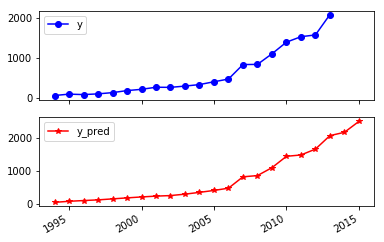

In [5]:
%matplotlib inline
#-*- coding: utf-8 -*-
import pandas as pd
inputfile = '../tmp/data1_GM11.xls' #灰色预测后保存的路径
#inputfile1 = '../tmp/data1_GM12.xls'
outputfile = '../data/revenue11.xls' #神经网络预测后保存的结果
#outputfile1 = '../data/revenue12.xls'
modelfile = '../tmp/1-net.model' #模型保存路径
data = pd.read_excel(inputfile) #读取数据
#feature = ['x1', 'x2', 'x3', 'x4', 'x5', 'x7'] #特征所在列
feature = ['x3','x5','x7']

data_train = data.loc[range(1994,2014)].copy() #取2014年前的数据建模
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train - data_mean)/data_std #数据标准化
x_train = data_train[feature].values #特征数据
y_train = data_train['y'].values #标签数据

from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential() #建立模型
model.add(Dense(12,activation='relu',input_dim=3))
 #用relu函数作为激活函数，能够大幅提供准确度
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') #编译模型
model.fit(x_train, y_train, epochs = 10000, batch_size = 16,verbose=2) #训练模型，学习一万次
model.save_weights(modelfile) #保存模型参数

#预测，并还原结果。
x = ((data[feature] - data_mean[feature])/data_std[feature]).values
data[u'y_pred'] = model.predict(x) * data_std['y'] + data_mean['y']
data.to_excel(outputfile)

import matplotlib.pyplot as plt #画出预测结果图
p = data[['y','y_pred']].plot(subplots = True, style=['b-o','r-*'])
plt.show()

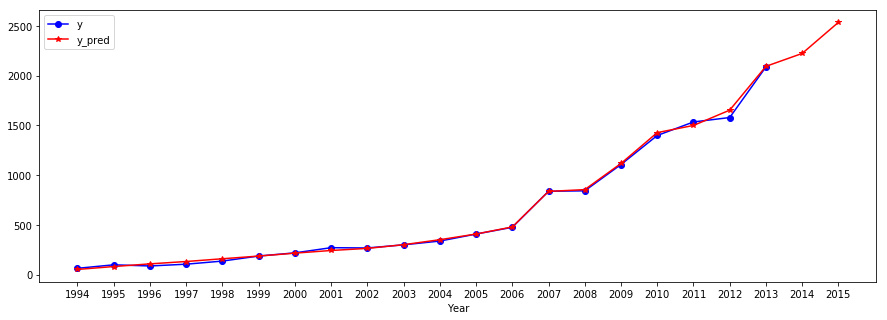

In [6]:
%matplotlib inline
import pandas as pd
file = '../data/revenue12.xls'

p = pd.read_excel(file)
p = p[['y','y_pred']].copy()
p.index=range(1994,2016)
import matplotlib.pylab as plt
#使用pandas的画图函数作图
p.plot(style=['b-o','r-*'],xticks=p.index,figsize=(15,5))
plt.xlabel("Year")
plt.show()